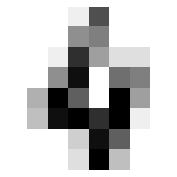

In [529]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
iris= datasets.load_iris()
digits = datasets.load_digits()

clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(digits.data[:-1], digits.target[:-1])

a = clf.predict(digits.data[-1:])

image = digits.images[4]
image = image.reshape(8, 8)
_, _plt = plt.subplots(figsize=(10, 3))
_plt.set_axis_off()
_plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

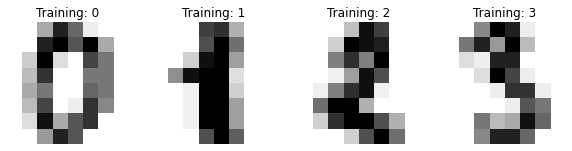

In [530]:


# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)



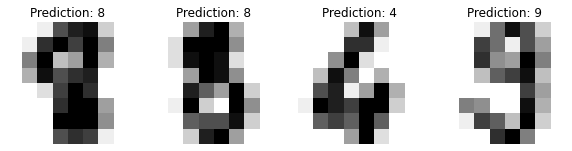

In [531]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [532]:
import numpy as np
from sklearn import kernel_approximation

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
print(X.shape)

transformer = kernel_approximation.RBFSampler()
X_new = transformer.fit_transform(X)
print(X_new.shape)

(10, 2000)
(10, 100)


In [533]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)

list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [534]:
clf.fit(iris.data, iris.target_names[iris.target])
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

In [535]:
X, y = datasets.load_iris(return_X_y=True)

clf = SVC()
clf.set_params(kernel='linear').fit(X,y)
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [536]:
clf.set_params(kernel='rbf').fit(X, y)
clf.predict(X[:5])


array([0, 0, 0, 0, 0])

In [537]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(random_state=0))
classif.fit(X, y).predict(X)
print(classif.score(X,y))

1.0


In [538]:
y = LabelBinarizer().fit_transform(y)
print(y)
classif.fit(X, y).predict(X)
print(classif.score(X,y))

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]
0.6


In [539]:
from sklearn.preprocessing import MultiLabelBinarizer
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)

classif.fit(X, y).predict(X[4:])
classif.score(X,y)

0.6

In [540]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

(442, 10)
(442,)
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


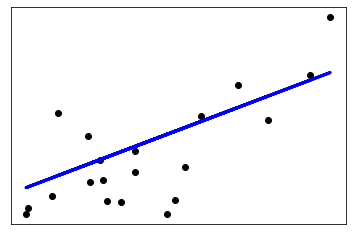

In [541]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

(768, 1)
(768,)
[0.34643344 0.33443647 0.34643344 0.35843041 0.33443647 0.37342662
 0.35843041 0.37342662 0.37642587 0.34943268 0.35543117 0.37942511
 0.32843799 0.35243193 0.33443647 0.35543117 0.34643344 0.34943268
 0.33143723 0.34643344]


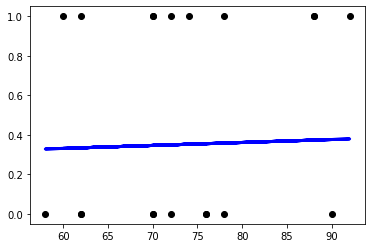

In [542]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("../../file/diabetes.csv")
df = np.array(df)

X = df[:,0:-1]
X = X[:, np.newaxis, 2]

y = df[:,-1]
print(X.shape)

print(y.shape)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42
# )

X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

# score = reg.score(X_train, y_train)
y_pred = reg.predict(X_test)

# print("score: %d" % score)
print(y_pred)


plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
# plt.xticks(())
# plt.yticks(())

plt.show()


In [543]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 

# Modeling
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

df = pd.read_csv("../../file/diabetes.csv")
# df = np.array(df)


nRow,nCol = df.shape
print(nRow, nCol)
df.info()

768 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [544]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [545]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


Text(0.5, 1.0, ' Corelation Of Columns')

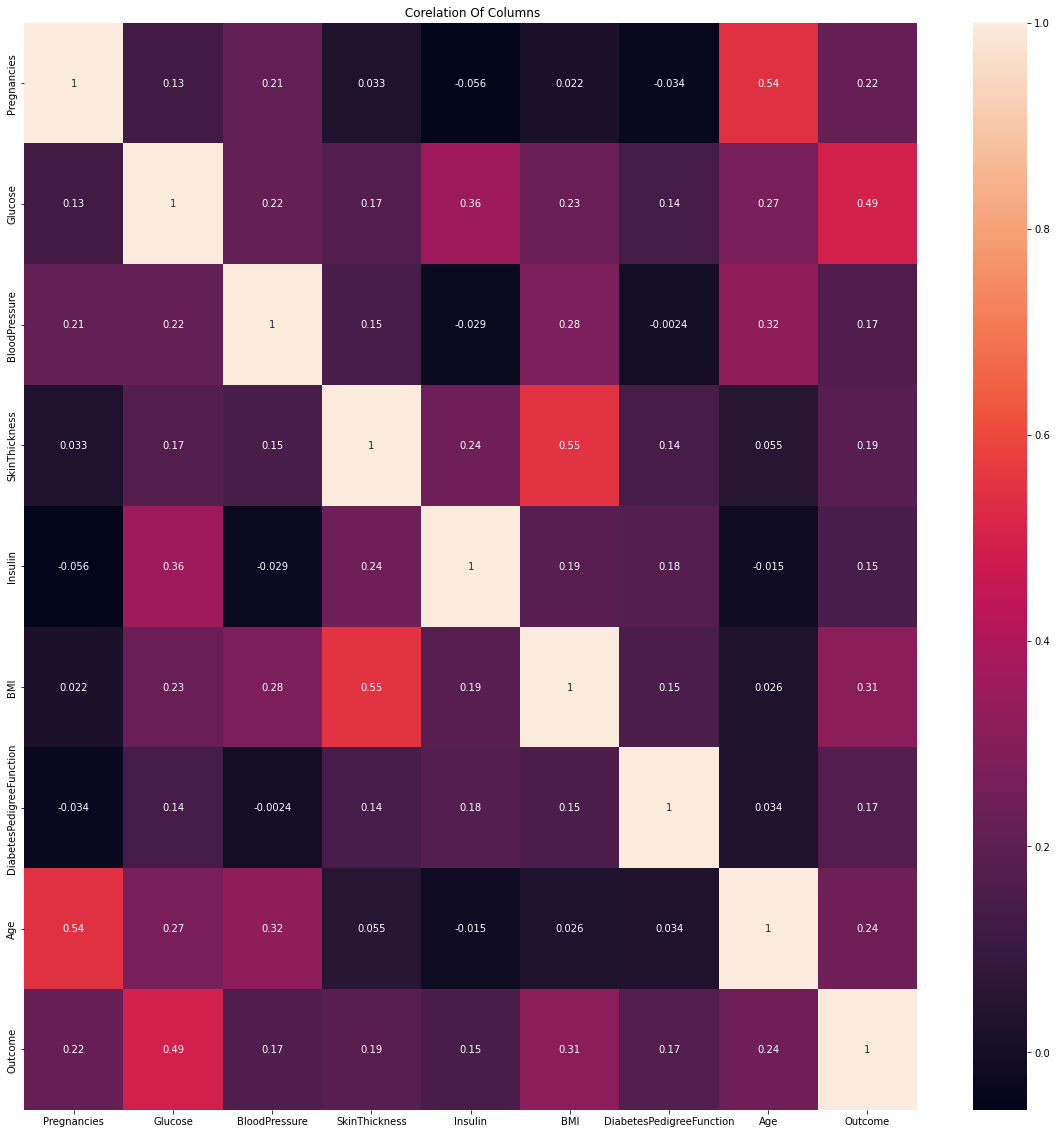

In [546]:
plt.figure(figsize=(20,20))
corr_columns = df.corr()
sns.heatmap(corr_columns,annot=True)
plt.title(' Corelation Of Columns')

Text(0, 0.5, 'Count')

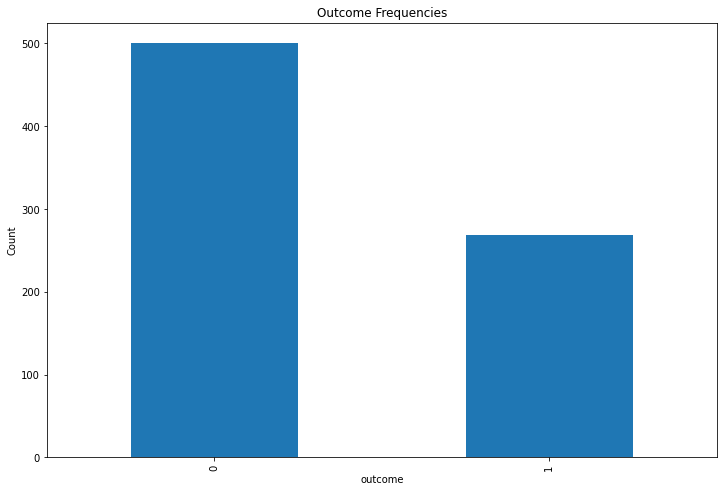

In [547]:
plt.figure(figsize=(12,8))
df['Outcome'].value_counts().plot(kind = 'bar')
plt.title('Outcome Frequencies')
plt.xlabel('outcome')
plt.ylabel('Count')

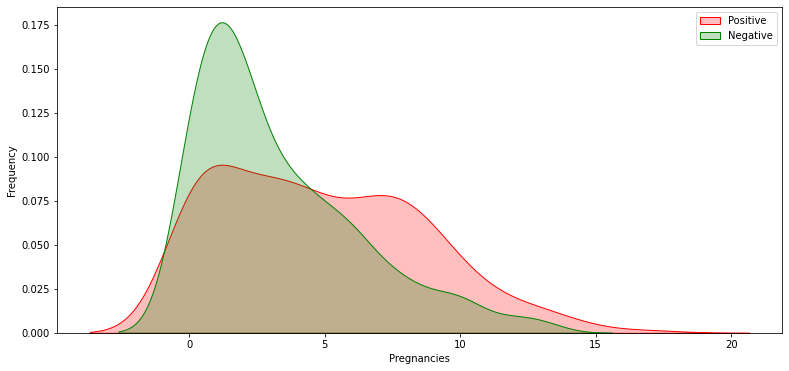

In [548]:
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],  color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

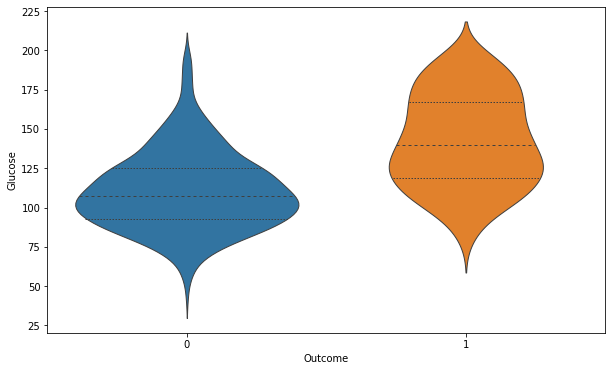

In [549]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",split=True, inner="quart", linewidth=1)

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

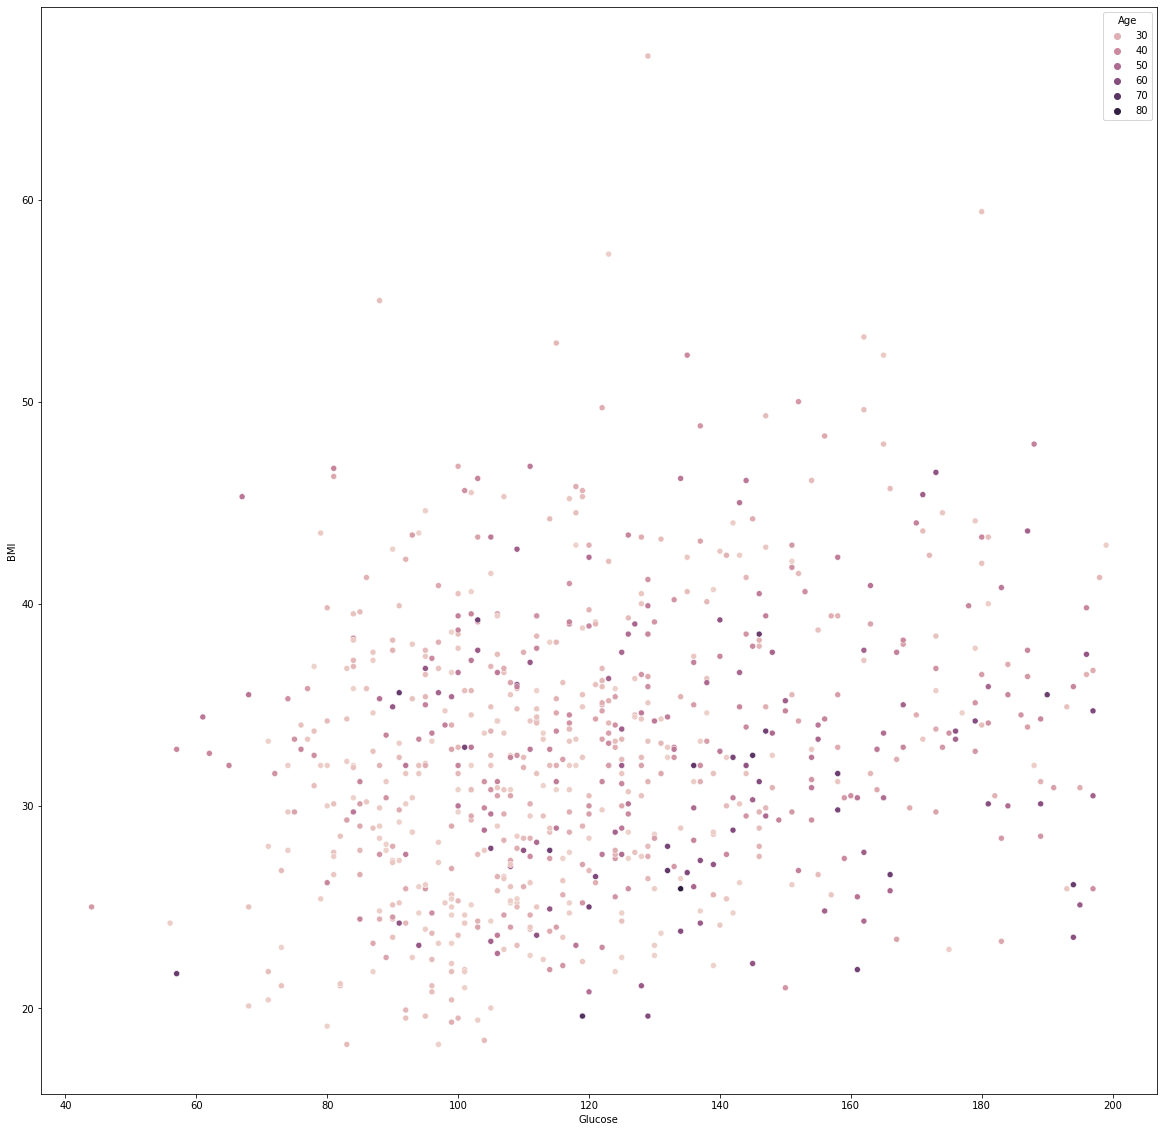

In [550]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x="Glucose", y="BMI",hue="Age")

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

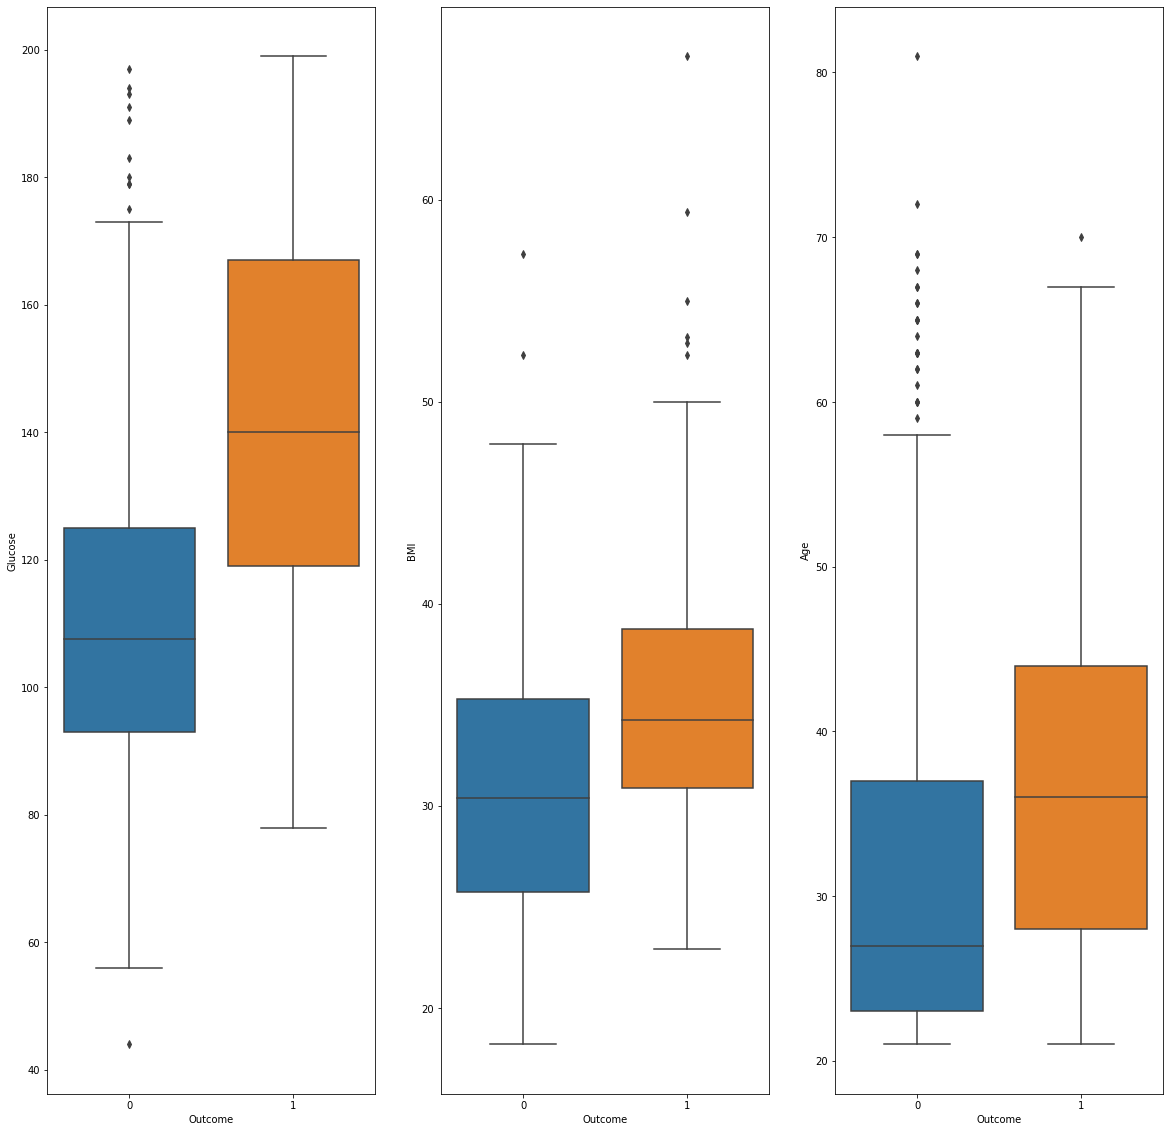

In [551]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
sns.boxplot(data=df,x="Outcome",y="Glucose")
plt.subplot(1,3,2)
sns.boxplot(data=df,x="Outcome",y="BMI")
plt.subplot(1,3,3)
sns.boxplot(data=df,x="Outcome",y="Age")

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

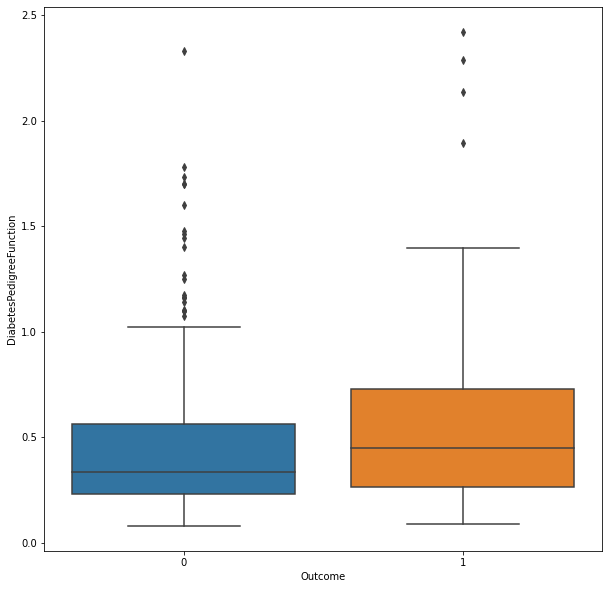

In [552]:
plt.figure(figsize=(10,10))

sns.boxplot(data=df,x="Outcome",y="DiabetesPedigreeFunction")

In [553]:
def detect_outliers(data,cols):
    for x in cols:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan


outliers_to_drop = detect_outliers(df, ["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])
df.isnull().sum()

Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness               35
Insulin                     49
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [554]:
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)
df.isnull().sum()

(768, 9)
(636, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [555]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
print(X[:1])

data ={'Pregnancies': [0.0],
    'Glucose': [100.0],
    'BloodPressure': [70.0],
    'SkinThickness': [0.0],
    'Insulin': [0.0],
    'BMI': [23.3],
    'DiabetesPedigreeFunction': [0.672],
    'Age': [20.0]}
X1 = pd.DataFrame(data=data)
print("&"*10)
print(X1[:1])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     30.5  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
&&&&&&&&&&
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          0.0    100.0           70.0            0.0      0.0  23.3   

   DiabetesPedigreeFunction   Age  
0                     0.672  20.0  


In [556]:
scaler = StandardScaler()

# standardisted = scaler.fit_transform(X)
# X = standardisted
X = np.asarray(X)
print(X[:1])

# standardisted1 = scaler.fit_transform(np.asarray(X1))
# X1 = standardisted1
# print(X1[:1])

[[  6.    148.     72.     35.     30.5    33.6     0.627  50.   ]]


In [557]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=100)
X_validation, X_test,y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=100)

In [558]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

381
381
128
128


In [559]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


c:\Users\User\anaconda3\envs\skleran1.1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [560]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [561]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [562]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [563]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [564]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [565]:
ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)

AdaBoostClassifier()

In [566]:
print("Scores of the models")
print("Logistic regression:", lr_model.score(X_validation, y_validation))
print("Decision tree:", dt_model.score(X_validation, y_validation))
print("Naive Bayes:", nb_model.score(X_validation, y_validation))
print("SVM:", svm_model.score(X_validation, y_validation))
print("Random forest:", rf_model.score(X_validation, y_validation))
print("Gradient boosting:", gb_model.score(X_validation, y_validation))
print("AdaBoost:", ab_model.score(X_validation, y_validation))

Scores of the models
Logistic regression: 0.7401574803149606
Decision tree: 0.7086614173228346
Naive Bayes: 0.7322834645669292
SVM: 0.7165354330708661
Random forest: 0.7637795275590551
Gradient boosting: 0.7165354330708661
AdaBoost: 0.7007874015748031


In [567]:
#예측결과
print(X_validation[:1])
X1 = np.array(X1)
print(X1)

svm_predicted_labels = lr_model.predict(X1)
print(svm_predicted_labels)

[[  5.    187.     76.     27.    207.     43.6     1.034  53.   ]]
[[  0.    100.     70.      0.      0.     23.3     0.672  20.   ]]
[0]


In [568]:
print("F1-scores of the models:")
lr_predicted_labels = lr_model.predict(X_validation)
print("Logistic regression:", f1_score(y_validation, lr_predicted_labels))

dt_predicted_labels = dt_model.predict(X_validation)
print("Decision Tree:", f1_score(y_validation, dt_predicted_labels))

nb_predicted_labels = nb_model.predict(X_validation)
print("Naive Bayes:", f1_score(y_validation, nb_predicted_labels))

svm_predicted_labels = svm_model.predict(X_validation)
print("Support Vector Machine:", f1_score(y_validation, svm_predicted_labels))

rf_predicted_labels = rf_model.predict(X_validation)
print("Random Forest:", f1_score(y_validation, rf_predicted_labels))

gb_predicted_labels = gb_model.predict(X_validation)
print("Gradient boosting:", f1_score(y_validation, gb_predicted_labels))

ab_predicted_labels = ab_model.predict(X_validation)
print("AdaBoost:", f1_score(y_validation, ab_predicted_labels))

F1-scores of the models:
Logistic regression: 0.5599999999999999
Decision Tree: 0.6021505376344086
Naive Bayes: 0.6046511627906976
Support Vector Machine: 0.45454545454545453
Random Forest: 0.625
Gradient boosting: 0.5609756097560975
AdaBoost: 0.5581395348837209


In [569]:
print("precision of the models:")

lr_predicted_labels = lr_model.predict(X_validation)
print("Logistic regression:", precision_score(y_validation, lr_predicted_labels))
dt_predicted_labels = dt_model.predict(X_validation)
print("Decision Tree:", precision_score(y_validation, dt_predicted_labels))

nb_predicted_labels = nb_model.predict(X_validation)
print("Naive Bayes:", precision_score(y_validation, nb_predicted_labels))

svm_predicted_labels = svm_model.predict(X_validation)
print("Support Vector Machine:", precision_score(y_validation, svm_predicted_labels))

rf_predicted_labels = rf_model.predict(X_validation)
print("Random Forest:",precision_score(y_validation, rf_predicted_labels))

gb_predicted_labels = gb_model.predict(X_validation)
print("Gradient boosting:", precision_score(y_validation, gb_predicted_labels))

ab_predicted_labels = ab_model.predict(X_validation)
print("AdaBoost:", precision_score(y_validation, ab_predicted_labels))

precision of the models:
Logistic regression: 0.7241379310344828
Decision Tree: 0.5957446808510638
Naive Bayes: 0.65
Support Vector Machine: 0.75
Random Forest: 0.7352941176470589
Gradient boosting: 0.6388888888888888
AdaBoost: 0.6


In [570]:
print("SVM:", svm_model.score(X_test, y_test))

SVM: 0.7890625


In [571]:
svm_predicted_labels = svm_model.predict(X_test)

print("Support Vector Machine:", precision_score(y_test, svm_predicted_labels))

Support Vector Machine: 0.875


In [572]:
svm_predicted_labels = svm_model.predict(X_test)
print("Support Vector Machine:", f1_score(y_test, svm_predicted_labels))

Support Vector Machine: 0.509090909090909


In [573]:
print("SVM grid search with a radial basis function kernel")

# rbf, C=1, gamma=0.1
svm_1_01 = SVC(kernel='rbf', C=1, gamma=0.1)
svm_1_01.fit(X_train, y_train)
print("C=1, gamma=0.1", svm_1_01.score(X_validation, y_validation))

# rbf, C=1, gamma=1
svm_1_1 = SVC(kernel='rbf', C=1, gamma=1)
svm_1_1.fit(X_train, y_train)
print("C=1, gamma=1", svm_1_1.score(X_validation, y_validation))

# rbf, C=1, gamma=10
svm_1_10 = SVC(kernel='rbf', C=1, gamma=10)
svm_1_10.fit(X_train, y_train)
print("C=1, gamma=10", svm_1_10.score(X_validation, y_validation))

# rbf, C=10, gamma=0.1
svm_10_01 = SVC(kernel='rbf', C=10, gamma=0.1)
svm_10_01.fit(X_train, y_train)
print("C=10, gamma=0.1", svm_10_01.score(X_validation, y_validation))

# rbf, C=10, gamma=1
svm_10_1 = SVC(kernel='rbf', C=10, gamma=1)
svm_10_1.fit(X_train, y_train)
print("C=10, gamma=1", svm_10_1.score(X_validation, y_validation))

# rbf, C=10, gamma=10
svm_10_10 = SVC(kernel='rbf', C=10, gamma=10)
svm_10_10.fit(X_train, y_train)
print("C=10, gamma=10", svm_10_10.score(X_validation, y_validation))

SVM grid search with a radial basis function kernel
C=1, gamma=0.1 0.6377952755905512
C=1, gamma=1 0.6377952755905512
C=1, gamma=10 0.6377952755905512
C=10, gamma=0.1 0.6377952755905512
C=10, gamma=1 0.6377952755905512
C=10, gamma=10 0.6377952755905512


In [574]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100000000]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train, y_train)

svm_winner = svm_gs.best_estimator_
svm_winner
svm_winner.score(X_validation, y_validation)

0.6535433070866141